In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('Temperature and Humidity Pairs - KAG_energydata_complete.csv')

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
df_ = df.drop(['date', 'lights', 'Appliances'], axis=1)

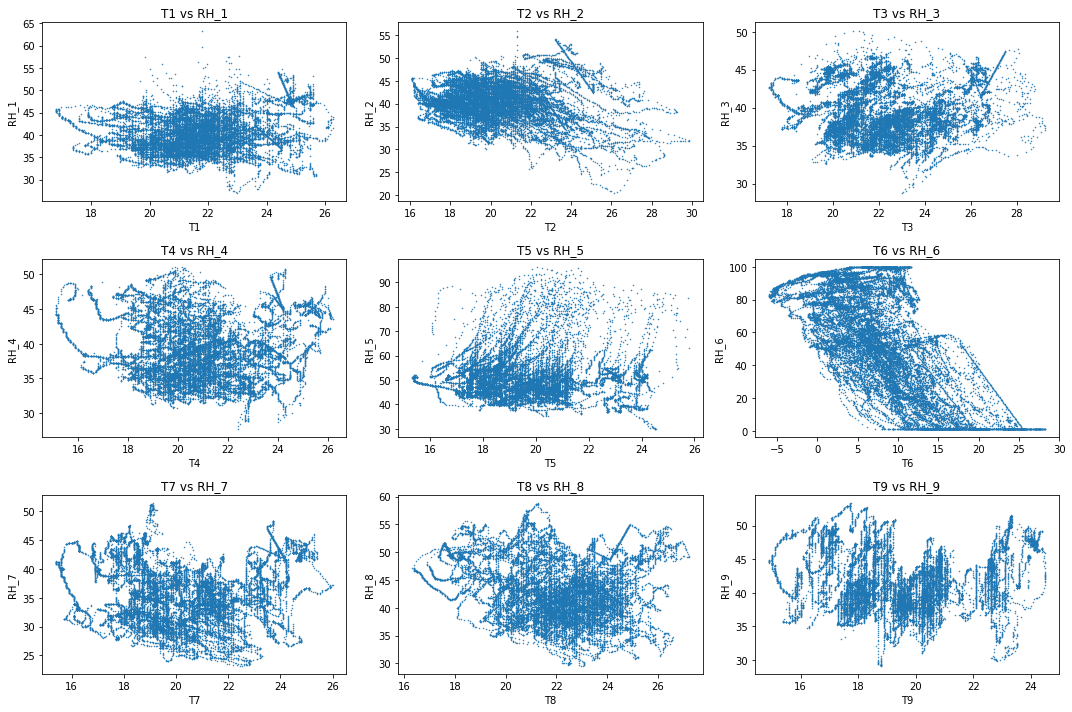

In [6]:
plt.figure(figsize=(15, 10))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.plot(df_[df_.columns[2*i]], df_[df_.columns[2*i+1]], '.', markersize=1)
    plt.xlabel(df_.columns[2*i])
    plt.ylabel(df_.columns[2*i+1])
    plt.title(df_.columns[2*i] + ' vs ' + df_.columns[2*i+1])
plt.tight_layout()
plt.savefig("temphum1.png")

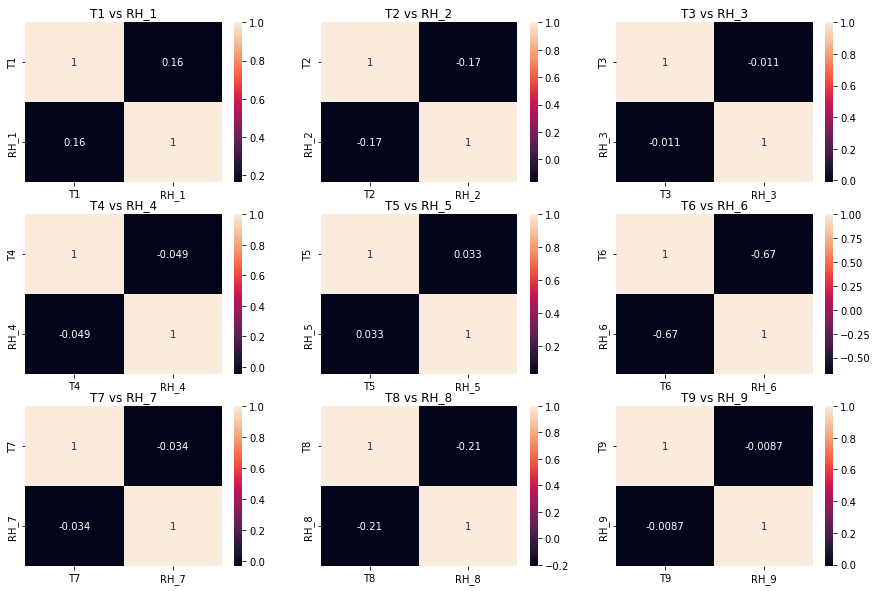

In [7]:
# plot the correlations in rooms
plt.figure(figsize=(15, 10))
for i in range(0, 9):
    plt.subplot(3, 3, 1+i)
    sns.heatmap(df_[df_.columns[2*i:2*i+2]].corr(), annot=True)
    plt.title(df_.columns[2*i] + ' vs ' + df_.columns[2*i+1])
plt.savefig("temphum2.png")

In [8]:
df_ene = pd.read_csv('2018Floor1.csv')

In [11]:
df_ene.head()

,Date,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
0,2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,35.76
1,2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,35.81
2,2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,35.78
3,2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,35.83
4,2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,35.86


In [15]:
df_ene_ = df_ene.drop(['Date'], axis=1)

In [43]:
sums = df_ene_.sum(axis=1)
dates = df_ene['Date']
sums = pd.concat([dates, sums], axis=1)
sums.columns = ['Date', 'Energy']
sums.head()

,Date,Energy
0,2018-07-01 00:00:00,155.73
1,2018-07-01 00:01:00,155.44
2,2018-07-01 00:02:00,155.34
3,2018-07-01 00:03:00,154.92
4,2018-07-01 00:04:00,154.07


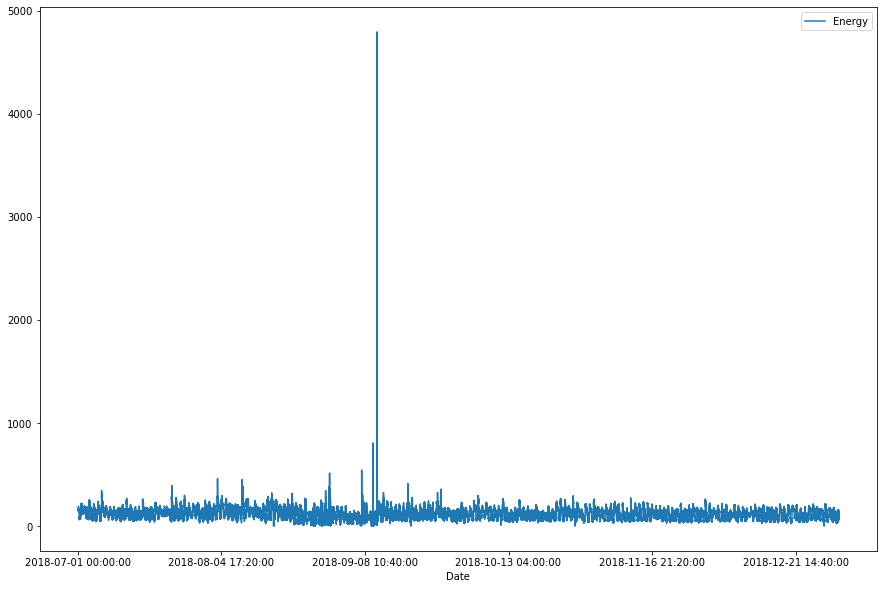

In [45]:
sums.groupby('Date').sum().plot(figsize=(15, 10))
plt.savefig("energy.png")